# Details of pre processing

In [3]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/Churn_ Data.csv')
df

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,-0.17,1,...,0.454642,0.497397,4,0,9,6.02,8.20,46.465636,0.609456,0.22
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,-0.32,3,...,0.343190,0.767617,6,0,20,3.66,8.10,34.525456,1.000000,0.38
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,-0.05,3,...,0.101838,0.619034,6,1,19,4.33,4.36,10.298451,0.699592,0.11
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,-0.18,4,...,0.066602,0.437088,7,2,11,3.40,3.53,6.670783,0.086617,5.18
4,-0.97,96.8379,2.674316,2.912397,3,2,22.50,66.886,0.01,4,...,0.219821,0.585977,6,1,14,3.85,3.87,21.998905,0.683105,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.21,132.0365,2.652236,2.857739,5,8,26.67,123.396,-0.16,4,...,0.145831,0.200151,7,0,18,3.57,3.83,14.896154,0.328027,0.76
24996,0.80,77.0154,3.763389,5.012503,2,8,27.88,62.140,0.19,4,...,0.529829,0.169835,7,0,18,6.89,7.70,55.156230,0.288006,12.74
24997,0.01,148.8337,3.823940,4.334250,6,10,10.00,98.900,-0.03,2,...,0.327245,0.407944,3,0,12,6.63,7.48,33.222018,0.235918,8.07
24998,0.17,1012.4398,14.667580,14.579567,7,67,42.92,734.005,0.70,4,...,0.824671,0.889239,7,1,1,19.36,22.26,82.549378,0.952962,21.21


#to check data is normally distributed or not

In [4]:
import pandas as pd
from scipy.stats import shapiro
def check_normality(df):
    for column in df.columns:
        statistic, p_value = shapiro(df[column])
        alpha = 0.05
        if p_value > alpha:
            print(f"The data in column '{column}' is normally distributed (p-value={p_value:.4f})")
        else:
            print(f"The data in column '{column}' is not normally distributed (p-value={p_value:.4f})")
check_normality(df)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The data in column 's6.new.rev.p2.m2' is not normally distributed (p-value=0.0000)
The data in column 's1.new.rev.m1' is not normally distributed (p-value=0.0000)
The data in column 's3.og.rev.4db.p5' is not normally distributed (p-value=0.0000)
The data in column 's3.new.rev.4db.p5' is not normally distributed (p-value=0.0000)
The data in column 's4.usg.ins.p2' is not normally distributed (p-value=0.0000)
The data in column 's4.og.unq.any.p2' is not normally distributed (p-value=0.0000)
The data in column 's2.rch.val.p6' is not normally distributed (p-value=0.0000)
The data in column 's1.og.rev.all.m1' is not normally distributed (p-value=0.0000)
The data in column 's8.new.rev.p6' is not normally distributed (p-value=0.0000)
The data in column 's4.loc.ic.ins.p1' is not normally distributed (p-value=0.0000)
The data in column 's8.mbl.p2' is not normally distributed (p-value=0.0000)
The data in column 's2.rch.val.l67' is not normally distributed (p-value=0.0000)
The data in column 's7.s

step1:- Convert data type of variables which are misclassified

In [5]:
print(df.dtypes)

s6.new.rev.p2.m2              float64
s1.new.rev.m1                 float64
s3.og.rev.4db.p5              float64
s3.new.rev.4db.p5             float64
s4.usg.ins.p2                   int64
                               ...   
s3.og.rev.all.m2              float64
s3.new.rev.m2                 float64
prop.og.mou.any.p6            float64
prop.loc.i2i.mou.og.mou.p3    float64
s3.rev.p1                     float64
Length: 111, dtype: object


In [6]:
print(df.dtypes.unique())

[dtype('float64') dtype('int64')]


In [8]:
def count_misclassified_columns(df):
    """
    Count misclassified columns in a DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.

    Returns:
        int: Number of misclassified columns.
    """
    misclassified_count = sum(df.dtypes != 'float64')
    return misclassified_count

# Count misclassified columns
misclassified_count = count_misclassified_columns(df)
print("Number of misclassified columns:", misclassified_count)

Number of misclassified columns: 31


In [9]:
def count_misclassified_columns(df):
    """
    Count misclassified columns in a DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.

    Returns:
        int: Number of misclassified columns.
    """
    misclassified_count = sum(df.dtypes != 'int64')
    return misclassified_count

# Count misclassified columns
misclassified_count = count_misclassified_columns(df)
print("Number of misclassified columns:", misclassified_count)

Number of misclassified columns: 80


In [10]:
def convert_misclassified_columns(df):
    """
    Convert misclassified columns to correct data type.

    Parameters:
        df (DataFrame): Input DataFrame.

    Returns:
        DataFrame: DataFrame with corrected data types.
    """
    # Check misclassified columns
    misclassified_columns = df.columns[df.dtypes != 'float64']

    # Convert misclassified columns to float64
    df[misclassified_columns] = df[misclassified_columns].astype('float64')

    return df

# Convert misclassified columns
df_corrected = convert_misclassified_columns(df)

# Display corrected DataFrame
print(df_corrected)

       s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0                 -0.76        88.0482          3.106604           3.754955   
1                 -0.98        67.5039          3.094574           5.550865   
2                 -0.98        33.9248          2.324016           2.438114   
3                 -0.92        82.6780          2.630749           2.858961   
4                 -0.97        96.8379          2.674316           2.912397   
...                 ...            ...               ...                ...   
24995              0.21       132.0365          2.652236           2.857739   
24996              0.80        77.0154          3.763389           5.012503   
24997              0.01       148.8337          3.823940           4.334250   
24998              0.17      1012.4398         14.667580          14.579567   
24999             -1.00       275.3530          5.134579           5.954062   

       s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.

In [11]:
df

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-0.76,88.0482,3.106604,3.754955,4.0,14.0,39.29,57.320,-0.17,1.0,...,0.454642,0.497397,4.0,0.0,9.0,6.02,8.20,46.465636,0.609456,0.22
1,-0.98,67.5039,3.094574,5.550865,1.0,2.0,21.67,38.700,-0.32,3.0,...,0.343190,0.767617,6.0,0.0,20.0,3.66,8.10,34.525456,1.000000,0.38
2,-0.98,33.9248,2.324016,2.438114,2.0,3.0,30.00,15.320,-0.05,3.0,...,0.101838,0.619034,6.0,1.0,19.0,4.33,4.36,10.298451,0.699592,0.11
3,-0.92,82.6780,2.630749,2.858961,2.0,3.0,50.00,51.956,-0.18,4.0,...,0.066602,0.437088,7.0,2.0,11.0,3.40,3.53,6.670783,0.086617,5.18
4,-0.97,96.8379,2.674316,2.912397,3.0,2.0,22.50,66.886,0.01,4.0,...,0.219821,0.585977,6.0,1.0,14.0,3.85,3.87,21.998905,0.683105,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.21,132.0365,2.652236,2.857739,5.0,8.0,26.67,123.396,-0.16,4.0,...,0.145831,0.200151,7.0,0.0,18.0,3.57,3.83,14.896154,0.328027,0.76
24996,0.80,77.0154,3.763389,5.012503,2.0,8.0,27.88,62.140,0.19,4.0,...,0.529829,0.169835,7.0,0.0,18.0,6.89,7.70,55.156230,0.288006,12.74
24997,0.01,148.8337,3.823940,4.334250,6.0,10.0,10.00,98.900,-0.03,2.0,...,0.327245,0.407944,3.0,0.0,12.0,6.63,7.48,33.222018,0.235918,8.07
24998,0.17,1012.4398,14.667580,14.579567,7.0,67.0,42.92,734.005,0.70,4.0,...,0.824671,0.889239,7.0,1.0,1.0,19.36,22.26,82.549378,0.952962,21.21


In [12]:
def count_misclassified_columns(df):
    """
    Count misclassified columns in a DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.

    Returns:
        int: Number of misclassified columns.
    """
    misclassified_count = sum((df.dtypes != 'float64') & (df.dtypes != 'int64'))
    return misclassified_count

# Count misclassified columns
misclassified_count = count_misclassified_columns(df)
print("Number of misclassified columns:", misclassified_count)

Number of misclassified columns: 0


step 2:- Remove duplicate value

In [13]:
def count_duplicate_records(df):
    """
    Count duplicate records in a DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.

    Returns:
        int: Number of duplicate records.
    """
    duplicate_count = df.duplicated().sum()
    return duplicate_count

# Count duplicate records
duplicate_count = count_duplicate_records(df)
print("Number of duplicate records:", duplicate_count)

Number of duplicate records: 0


In [14]:
#if any duplicates
df.drop_duplicates(inplace=True)

step 3:- Removing Unique value variables

In [15]:
def count_unique_value_variables(df):
    """
    Count unique value variables in a DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.

    Returns:
        int: Number of unique value variables.
    """
    unique_value_variables = sum(df.nunique() == len(df))
    return unique_value_variables

# Count unique value variables
unique_value_variables_count = count_unique_value_variables(df)
print("Number of unique value variables:", unique_value_variables_count)

Number of unique value variables: 0


In [16]:
def remove_unique_value_variables(df):
    """
    Remove variables with all unique values from a DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.

    Returns:
        DataFrame: DataFrame with unique value variables removed.
    """
    unique_value_variables = []

    # Iterate through each column
    for column in df.columns:
        if df[column].nunique() == len(df):
            unique_value_variables.append(column)

    # Drop variables with all unique values
    df = df.drop(columns=unique_value_variables)

    return df

# Remove unique value variables
df = remove_unique_value_variables(df)
print("DataFrame with unique value variables removed:")
print(df)

DataFrame with unique value variables removed:
       s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0                 -0.76        88.0482          3.106604           3.754955   
1                 -0.98        67.5039          3.094574           5.550865   
2                 -0.98        33.9248          2.324016           2.438114   
3                 -0.92        82.6780          2.630749           2.858961   
4                 -0.97        96.8379          2.674316           2.912397   
...                 ...            ...               ...                ...   
24995              0.21       132.0365          2.652236           2.857739   
24996              0.80        77.0154          3.763389           5.012503   
24997              0.01       148.8337          3.823940           4.334250   
24998              0.17      1012.4398         14.667580          14.579567   
24999             -1.00       275.3530          5.134579           5.954062   

    

In [17]:
unique_value_cols = df.columns[df.nunique() == df.shape[0]]
df=df.drop(unique_value_cols, axis=1)
df

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-0.76,88.0482,3.106604,3.754955,4.0,14.0,39.29,57.320,-0.17,1.0,...,0.454642,0.497397,4.0,0.0,9.0,6.02,8.20,46.465636,0.609456,0.22
1,-0.98,67.5039,3.094574,5.550865,1.0,2.0,21.67,38.700,-0.32,3.0,...,0.343190,0.767617,6.0,0.0,20.0,3.66,8.10,34.525456,1.000000,0.38
2,-0.98,33.9248,2.324016,2.438114,2.0,3.0,30.00,15.320,-0.05,3.0,...,0.101838,0.619034,6.0,1.0,19.0,4.33,4.36,10.298451,0.699592,0.11
3,-0.92,82.6780,2.630749,2.858961,2.0,3.0,50.00,51.956,-0.18,4.0,...,0.066602,0.437088,7.0,2.0,11.0,3.40,3.53,6.670783,0.086617,5.18
4,-0.97,96.8379,2.674316,2.912397,3.0,2.0,22.50,66.886,0.01,4.0,...,0.219821,0.585977,6.0,1.0,14.0,3.85,3.87,21.998905,0.683105,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.21,132.0365,2.652236,2.857739,5.0,8.0,26.67,123.396,-0.16,4.0,...,0.145831,0.200151,7.0,0.0,18.0,3.57,3.83,14.896154,0.328027,0.76
24996,0.80,77.0154,3.763389,5.012503,2.0,8.0,27.88,62.140,0.19,4.0,...,0.529829,0.169835,7.0,0.0,18.0,6.89,7.70,55.156230,0.288006,12.74
24997,0.01,148.8337,3.823940,4.334250,6.0,10.0,10.00,98.900,-0.03,2.0,...,0.327245,0.407944,3.0,0.0,12.0,6.63,7.48,33.222018,0.235918,8.07
24998,0.17,1012.4398,14.667580,14.579567,7.0,67.0,42.92,734.005,0.70,4.0,...,0.824671,0.889239,7.0,1.0,1.0,19.36,22.26,82.549378,0.952962,21.21


step 4:-Removing Zero variance Variables

In [18]:
def check_zero_variance_variables(df):
    """
    Check for zero variance variables in a DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.

    Returns:
        list: List of zero variance variables.
    """
    zero_variance_variables = []

    # Iterate through each column
    for column in df.columns:
        if df[column].var() == 0:
            zero_variance_variables.append(column)

    return zero_variance_variables

# Check for zero variance variables
zero_variance_variables = check_zero_variance_variables(df)
print("Zero variance variables:", zero_variance_variables)

Zero variance variables: []


In [19]:
zero_var_cols = df.columns[df.var() == 0]
df = df.drop(zero_var_cols, axis=1)

In [20]:
def remove_zero_variance_variables(df):
    """
    Remove zero variance variables from a DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.

    Returns:
        DataFrame: DataFrame with zero variance variables removed.
    """
    # Find zero variance variables
    zero_variance_variables = [col for col in df.columns if df[col].nunique() == 1]

    # Drop zero variance variables
    df = df.drop(columns=zero_variance_variables)

    return df

# Remove zero variance variables
df_removed_zero_variance = remove_zero_variance_variables(df)
print("DataFrame with zero variance variables removed:")
print(df_removed_zero_variance)

DataFrame with zero variance variables removed:
       s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0                 -0.76        88.0482          3.106604           3.754955   
1                 -0.98        67.5039          3.094574           5.550865   
2                 -0.98        33.9248          2.324016           2.438114   
3                 -0.92        82.6780          2.630749           2.858961   
4                 -0.97        96.8379          2.674316           2.912397   
...                 ...            ...               ...                ...   
24995              0.21       132.0365          2.652236           2.857739   
24996              0.80        77.0154          3.763389           5.012503   
24997              0.01       148.8337          3.823940           4.334250   
24998              0.17      1012.4398         14.667580          14.579567   
24999             -1.00       275.3530          5.134579           5.954062   

   

step 5:- Treatment outlier

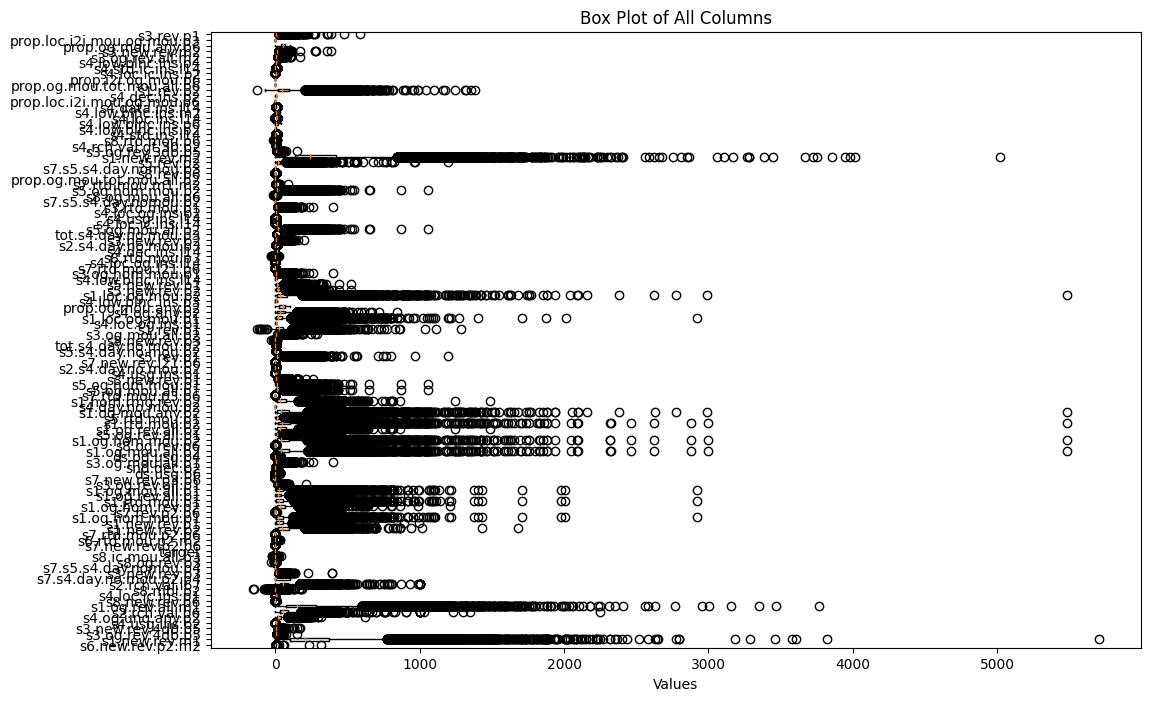

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('/content/Churn_ Data.csv')

plt.figure(figsize=(12, 8))
plt.boxplot([data[col] for col in data.columns], labels=data.columns, vert=False)
plt.title('Box Plot of All Columns')
plt.xlabel('Values')
plt.show()


In [23]:
from scipy.stats import zscore
def check_outliers_zscore(df, threshold=3):
    z_scores = df.apply(zscore)
    outliers = (z_scores.abs() > threshold).any(axis=1)
    df_outliers = df[outliers]

    return df_outliers

outliers_zscore = check_outliers_zscore(df)
print("Outliers identified using z-score method:")
print(outliers_zscore)

Outliers identified using z-score method:
       s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
2                 -0.98        33.9248          2.324016           2.438114   
3                 -0.92        82.6780          2.630749           2.858961   
5                  0.04       968.7667         14.717216          23.589827   
8                 -1.00       787.2101         22.598879          23.574696   
11                 0.65       724.7486         12.126048          12.099111   
...                 ...            ...               ...                ...   
24988              0.69        41.4332          4.634655           5.234325   
24992              0.56       718.3843          6.742948           7.106220   
24993             -1.00       292.0445          5.926085           7.682585   
24994              0.50       289.8830          7.517788           7.505742   
24998              0.17      1012.4398         14.667580          14.579567   

       s4

In [24]:
import pandas as pd
import numpy as np
from scipy import stats

data = pd.read_csv('/content/Churn_ Data.csv')

# Identify numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Apply Box-Cox transformation and remove outliers for numeric columns
for col in numeric_cols:
    # Check if the column has constant values
    if data[col].nunique() == 1:
        print(f"Skipping {col} as it has constant values.")
        continue

    # Remove any negative or zero values from the column
    data_positive = data[col][data[col] > 0]

    # Check if there are any positive values left after removing negatives and zeros
    if data_positive.empty:
        print(f"Skipping {col} as it has no positive values.")
        continue

    # Check if the column has variability
    if data_positive.nunique() == 1:
        print(f"Skipping {col} as it has no variability.")
        continue

    # Determine the optimal lambda value
    boxcox, lambda_optimal = stats.boxcox(data_positive)

    # Apply the Box-Cox transformation
    data[col] = stats.boxcox(data[col] + 1, lambda_optimal)

    print(f"Optimal lambda for {col}: {lambda_optimal}")

    # Remove outliers after Box-Cox transformation
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[col] = np.clip(data[col], lower_bound, upper_bound)

# Save the transformed and cleaned data
data.to_excel('fin_churn.xlsx', index=False)


Optimal lambda for s6.new.rev.p2.m2: 0.1114086240164518
Optimal lambda for s1.new.rev.m1: 0.26355194430374795
Optimal lambda for s3.og.rev.4db.p5: 0.0892761299714509
Optimal lambda for s3.new.rev.4db.p5: 0.05056126545369078
Optimal lambda for s4.usg.ins.p2: 2.8810276295155344
Optimal lambda for s4.og.unq.any.p2: 0.23294352219807574
Optimal lambda for s2.rch.val.p6: -0.1118190599724463
Optimal lambda for s1.og.rev.all.m1: 0.25564113660029364
Optimal lambda for s8.new.rev.p6: 0.09452118876725205
Optimal lambda for s4.loc.ic.ins.p1: 3.795574014626407
Optimal lambda for s8.mbl.p2: 0.13173701365839496
Optimal lambda for s2.rch.val.l67: -0.1304892306893007
Optimal lambda for s7.s4.day.no.mou.p2.p4: -0.17203676270140064
Optimal lambda for s3.new.rev.p3: 0.1597507204846539
Optimal lambda for s7.s5.s4.day.nomou.p4: 0.26045955205132465
Optimal lambda for s8.og.rev.p3: 0.1411588760809531
Optimal lambda for s8.ic.mou.all.p3: 0.07836113670469283
Skipping target as it has no variability.
Optimal lam

In [25]:
df=pd.read_excel("fin_churn.xlsx")
df

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-1.319447,8.592543,1.505534,1.622293,35.479409,3.774117,3.027505,7.149024,-0.184698,3.395045,...,0.449601,0.469015,58.016336,0.000000,3.015447,2.112445,2.244667,42.157443,0.569570,0.201366
1,-2.442675,7.765210,1.502206,1.971808,2.209887,1.251988,2.634625,6.113301,-0.378718,50.539118,...,0.340226,0.705242,174.406091,0.000000,4.369607,1.639942,2.233487,31.604743,0.903534,0.328717
2,-2.442675,5.884664,1.267944,1.274292,7.876314,1.636304,2.851558,4.075390,-0.051169,50.539118,...,0.101557,0.576688,174.406091,0.636223,4.273459,1.793113,1.693512,9.748409,0.648402,0.105050
3,-2.201486,8.391136,1.366588,1.397567,7.876314,1.636304,3.181390,6.879545,-0.196601,118.235599,...,0.066480,0.414742,269.728889,0.960209,3.327605,1.574993,1.522494,6.381018,0.085654,2.047568
4,-2.442675,8.903695,1.379979,1.412296,18.489568,1.251988,2.659938,7.586937,0.009955,118.235599,...,0.218559,0.547653,174.406091,0.636223,3.727468,1.685333,1.596024,20.403084,0.634067,0.095886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.192659,9.974936,1.373211,1.397227,60.232701,2.869108,2.773660,9.512452,-0.172925,118.235599,...,0.145263,0.195061,269.728889,0.000000,4.173507,1.617845,1.587641,13.965324,0.315384,0.585962
24996,0.607459,8.168171,1.674958,1.877707,7.876314,2.869108,2.803116,7.375855,0.175391,118.235599,...,0.523118,0.166129,269.728889,0.000000,4.173507,2.250095,2.187516,49.781180,0.278123,3.105387
24997,0.009956,10.413254,1.689486,1.747046,94.103210,3.211843,2.103326,8.780570,-0.030415,16.784462,...,0.324538,0.388290,27.866910,0.000000,3.468738,2.210482,2.161331,30.446238,0.229162,2.542206
24998,0.158385,19.719203,3.119021,2.945721,138.417851,7.178620,3.084293,17.228558,0.538568,118.235599,...,0.809549,0.808265,269.728889,0.636223,0.750018,3.416909,3.198095,73.578763,0.864298,3.794432


In [26]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Generate sample data (replace with your dataset)
np.random.seed(0)
X = np.random.normal(loc=0, scale=1, size=(100, 2))
X[0, 0] = 10  # introduce outlier

# Step 1: Identify outliers using z-score
mean_X = X.mean(axis=0)
std_X = X.std(axis=0)
z_scores = np.abs((X - mean_X) / std_X)
threshold = 3
outliers = np.any(z_scores > threshold, axis=1)

# Step 2: Remove outliers
X_clean = X[~outliers]

# Step 3: Standardize the cleaned data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

print("Original data shape:", X.shape)
print("Cleaned data shape:", X_clean.shape)
print("Scaled data mean:", X_scaled.mean(axis=0))
print("Scaled data std:", X_scaled.std(axis=0))


Original data shape: (100, 2)
Cleaned data shape: (99, 2)
Scaled data mean: [1.79429984e-17 1.79429984e-17]
Scaled data std: [1. 1.]


step 6:- Missing Value Treatment

In [27]:
missing_values_count = df.isnull().sum()

print("Number of missing values in each column:")
print(missing_values_count.tolist())


Number of missing values in each column:
[0, 0, 0, 0, 0, 0, 0, 0, 314, 0, 9131, 0, 0, 0, 0, 1622, 1512, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 178, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2696, 0, 480, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2679, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 685, 0, 0, 0, 338, 0, 0, 0, 0, 0, 719, 0, 0, 0, 0, 0, 0, 0, 0, 274, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [28]:
import pandas as pd

def missing_value_imputation(df, strategy='median'):
    strategies = {
        'mean': lambda x: x.fillna(x.mean()),
        'median': lambda x: x.fillna(x.median()),
        'mode': lambda x: x.fillna(x.mode().iloc[0])
    }

    imputed_df = df.copy()

    for col in imputed_df.columns:
        col_type = imputed_df[col].dtype
        if col_type == object:
            strategy = 'mode'
        else:
            strategy = strategy

        imputer = strategies.get(strategy, lambda x: x.fillna(strategy))
        imputed_df[col] = imputer(imputed_df[col])

    return imputed_df

# Example usage
df_imputed_median = missing_value_imputation(df, strategy='median')
print("DataFrame with missing values imputed using median:")
print(df_imputed_median)
df_imputed_median.to_excel('fin_churn.xlsx', index=False)


DataFrame with missing values imputed using median:
       s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0             -1.319447       8.592543          1.505534           1.622293   
1             -2.442675       7.765210          1.502206           1.971808   
2             -2.442675       5.884664          1.267944           1.274292   
3             -2.201486       8.391136          1.366588           1.397567   
4             -2.442675       8.903695          1.379979           1.412296   
...                 ...            ...               ...                ...   
24995          0.192659       9.974936          1.373211           1.397227   
24996          0.607459       8.168171          1.674958           1.877707   
24997          0.009956      10.413254          1.689486           1.747046   
24998          0.158385      19.719203          3.119021           2.945721   
24999         -2.442675      12.900681          1.969078           2.037591   


In [29]:
df=pd.read_excel("/content/fin_churn.xlsx")
missing_values_count = df.isnull().sum()

print("Number of missing values in each column:")
print(missing_values_count.tolist())
df


Number of missing values in each column:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-1.319447,8.592543,1.505534,1.622293,35.479409,3.774117,3.027505,7.149024,-0.184698,3.395045,...,0.449601,0.469015,58.016336,0.000000,3.015447,2.112445,2.244667,42.157443,0.569570,0.201366
1,-2.442675,7.765210,1.502206,1.971808,2.209887,1.251988,2.634625,6.113301,-0.378718,50.539118,...,0.340226,0.705242,174.406091,0.000000,4.369607,1.639942,2.233487,31.604743,0.903534,0.328717
2,-2.442675,5.884664,1.267944,1.274292,7.876314,1.636304,2.851558,4.075390,-0.051169,50.539118,...,0.101557,0.576688,174.406091,0.636223,4.273459,1.793113,1.693512,9.748409,0.648402,0.105050
3,-2.201486,8.391136,1.366588,1.397567,7.876314,1.636304,3.181390,6.879545,-0.196601,118.235599,...,0.066480,0.414742,269.728889,0.960209,3.327605,1.574993,1.522494,6.381018,0.085654,2.047568
4,-2.442675,8.903695,1.379979,1.412296,18.489568,1.251988,2.659938,7.586937,0.009955,118.235599,...,0.218559,0.547653,174.406091,0.636223,3.727468,1.685333,1.596024,20.403084,0.634067,0.095886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.192659,9.974936,1.373211,1.397227,60.232701,2.869108,2.773660,9.512452,-0.172925,118.235599,...,0.145263,0.195061,269.728889,0.000000,4.173507,1.617845,1.587641,13.965324,0.315384,0.585962
24996,0.607459,8.168171,1.674958,1.877707,7.876314,2.869108,2.803116,7.375855,0.175391,118.235599,...,0.523118,0.166129,269.728889,0.000000,4.173507,2.250095,2.187516,49.781180,0.278123,3.105387
24997,0.009956,10.413254,1.689486,1.747046,94.103210,3.211843,2.103326,8.780570,-0.030415,16.784462,...,0.324538,0.388290,27.866910,0.000000,3.468738,2.210482,2.161331,30.446238,0.229162,2.542206
24998,0.158385,19.719203,3.119021,2.945721,138.417851,7.178620,3.084293,17.228558,0.538568,118.235599,...,0.809549,0.808265,269.728889,0.636223,0.750018,3.416909,3.198095,73.578763,0.864298,3.794432


step 7:- Removing the highly correlated variables

In [32]:
def count_highly_correlated_variables(df, threshold=0.95):
    """
    Count highly correlated variables in a DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.
        threshold (float): Correlation threshold. Default is 0.8.

    Returns:
        int: Number of highly correlated variables.
    """
    # Calculate correlation matrix
    corr_matrix = df.corr().abs()

    # Create a mask to identify highly correlated features
    mask = (corr_matrix >= threshold) & (corr_matrix < 1)

    # Count the number of highly correlated variables
    count = sum(mask.sum())

    return count

# Count highly correlated variables
correlated_count = count_highly_correlated_variables(df)
print("Number of highly correlated variables:", correlated_count)

Number of highly correlated variables: 114


In [35]:
import pandas as pd
import numpy as np

def remove_highly_correlated_features(df, threshold=0.95):
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Convert the NumPy array to a DataFrame
    pairs_df = pd.DataFrame(upper_tri.stack()[upper_tri.stack() > threshold].reset_index().values, columns=['level_0', 'level_1', 'value'])

    # Get highly correlated pairs
    highly_correlated_pairs = [(pairs_df.loc[i, 'level_0'], pairs_df.loc[i, 'level_1']) for i in range(len(pairs_df))]

    # Remove one feature from each highly correlated pair
    columns_to_remove = set()
    for pair in highly_correlated_pairs:
        if pair[0] not in columns_to_remove and pair[1] not in columns_to_remove:
            columns_to_remove.add(pair[1])

    # Create a new DataFrame with the remaining features
    df_cleaned = df.drop(columns=columns_to_remove)

    return df_cleaned

# Example usage
df_cleaned = remove_highly_correlated_features(df, threshold=0.95)
df_cleaned.to_excel('fin_churn.xlsx', index=False)


In [36]:
df=pd.read_excel("fin_churn.xlsx")
df

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s8.new.rev.p6,s4.loc.ic.ins.p1,s8.mbl.p2,...,prop.loc.i2i.mou.og.mou.p6,s4.dec.ins.p2,s1.rev.p2,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s3.og.rev.all.m2,s3.new.rev.m2,prop.loc.i2i.mou.og.mou.p3
0,-1.319447,8.592543,1.505534,1.622293,35.479409,3.774117,3.027505,-0.184698,3.395045,-1.171954,...,0.468060,10.082296,2.553799,0.449601,0.469015,58.016336,0.000000,2.112445,2.244667,0.569570
1,-2.442675,7.765210,1.502206,1.971808,2.209887,1.251988,2.634625,-0.378718,50.539118,-0.082925,...,0.709129,1.408503,0.603137,0.340226,0.705242,174.406091,0.000000,1.639942,2.233487,0.903534
2,-2.442675,5.884664,1.267944,1.274292,7.876314,1.636304,2.851558,-0.051169,50.539118,-0.093727,...,0.647019,3.586938,0.438661,0.101557,0.576688,174.406091,0.636223,1.793113,1.693512,0.648402
3,-2.201486,8.391136,1.366588,1.397567,7.876314,1.636304,3.181390,-0.196601,118.235599,1.114929,...,0.416162,3.586938,6.293513,0.066480,0.414742,269.728889,0.960209,1.574993,1.522494,0.085654
4,-2.442675,8.903695,1.379979,1.412296,18.489568,1.251988,2.659938,0.009955,118.235599,-0.040712,...,0.550066,6.488505,1.110104,0.218559,0.547653,174.406091,0.636223,1.685333,1.596024,0.634067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.192659,9.974936,1.373211,1.397227,60.232701,2.869108,2.773660,-0.172925,118.235599,0.586896,...,0.195390,14.345402,4.560724,0.145263,0.195061,269.728889,0.000000,1.617845,1.587641,0.315384
24996,0.607459,8.168171,1.674958,1.877707,7.876314,2.869108,2.803116,0.175391,118.235599,0.321430,...,0.166369,3.586938,6.170360,0.523118,0.166129,269.728889,0.000000,2.250095,2.187516,0.278123
24997,0.009956,10.413254,1.689486,1.747046,94.103210,3.211843,2.103326,-0.030415,16.784462,-1.410669,...,0.439915,14.345402,4.576068,0.324538,0.388290,27.866910,0.000000,2.210482,2.161331,0.229162
24998,0.158385,19.719203,3.119021,2.945721,138.417851,7.178620,3.084293,0.538568,118.235599,0.209863,...,0.813631,10.082296,14.142142,0.809549,0.808265,269.728889,0.636223,3.416909,3.198095,0.864298


***step 8:-Multicollinearity (VIF > 5)***

In [37]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def remove_multicollinearity(df, threshold=5.0):
    """
    Removes multicollinearity from a DataFrame by recursively dropping variables with a high Variance Inflation Factor (VIF).

    Args:
        df (pandas.DataFrame): The input DataFrame.
        threshold (float): The maximum VIF value allowed. Variables with a VIF above this threshold will be dropped.

    Returns:
        pandas.DataFrame: The input DataFrame with multicollinearity removed.
    """
    # Make a copy of the original DataFrame to avoid modifying the original data
    data = df.copy()

    # Create a list of variable names
    variables = list(data.columns)

    # Iterate until no variables have a VIF above the threshold
    while True:
        dropped = False
        vif_values = [variance_inflation_factor(data[variables].values, i) for i in range(data[variables].shape[1])]
        max_vif = max(vif_values)

        if max_vif > threshold:
            # Drop the variable with the highest VIF
            max_vif_idx = vif_values.index(max_vif)
            dropped_variable = variables[max_vif_idx]
            print(f"Dropping '{dropped_variable}' with VIF={max_vif:.2f}")
            data = data.drop(dropped_variable, axis=1)
            variables = list(data.columns)
            dropped = True

        if not dropped:
            break

    print("\nRemaining variables:")
    print(", ".join(data.columns))

    return data

# Example usage
df = pd.read_excel('fin_churn.xlsx')
df_no_multicollinearity = remove_multicollinearity(df)
df_no_multicollinearity.to_excel('fin_churn_no_multicollinearity.xlsx', index=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's1.new.rev.p2' with VIF=655.63


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's1.new.rev.m2' with VIF=449.74


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's1.og.mou.all.p2' with VIF=412.95


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's2.rch.val.l67' with VIF=386.38


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's1.og.rev.all.p1' with VIF=356.72


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's3.new.rev.m2' with VIF=300.53


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's1.og.hom.rev.p2' with VIF=202.35


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's1.new.rev.p1' with VIF=167.91


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's1.loc.og.mou.p2' with VIF=149.30


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's4.loc.og.ins.p2' with VIF=142.06


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's3.og.rev.all.m2' with VIF=120.76


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's4.og.any.p2' with VIF=115.44


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's5.new.rev.p2' with VIF=105.13


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's1.rev.p2' with VIF=100.80


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's7.rtd.mou.l21.p6' with VIF=97.17


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's1.rtd.mou.p1' with VIF=87.35


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's4.usg.ins.p2' with VIF=83.07


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's3.og.mou.all.p1' with VIF=77.00


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's2.rch.val.p6' with VIF=68.61


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's7.new.rev.p3.p6' with VIF=68.09


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's5.rev.p1' with VIF=67.50


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's4.loc.ic.ins.p2' with VIF=64.82


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's3.new.rev.4db.p5' with VIF=61.22


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's4.dec.ins.l14' with VIF=60.79


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's4.loc.og.ins.l14' with VIF=52.09


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's1.og.hom.mou.p1' with VIF=50.27


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's1.new.rev.m1' with VIF=47.12


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 'prop.og.mou.tot.mou.all.p2' with VIF=43.75


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 'prop.loc.i2i.mou.og.mou.p6' with VIF=40.43


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's4.loc.ic.ins.l14' with VIF=38.90


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's5.rev.p2' with VIF=36.44


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's7.new.rev.l21.p6' with VIF=33.94


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's4.og.unq.any.p2' with VIF=28.04


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's4.usg.ins.p1' with VIF=26.69


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's4.low.blnc.ins.p3' with VIF=25.84


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's3.new.rev.p1' with VIF=24.76


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's7.rtd.mou.p3.p6' with VIF=24.61


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's4.loc.ins.l14' with VIF=22.72


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's3.og.rev.4db.p5' with VIF=21.93


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's3.og.mou.all.p2' with VIF=19.83


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's1.rev.p1' with VIF=18.54


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 'prop.og.mou.tot.mou.all.p6' with VIF=18.30


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's1.loc.og.mou.p1' with VIF=16.49


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 'tot.s4.day.no.mou.p3' with VIF=16.34


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's4.day.no.mou.p2' with VIF=15.39


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's3.new.rev.p3' with VIF=13.65


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's4.std.ins.l14' with VIF=12.85


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 'prop.i2i.og.mou.p6' with VIF=11.93


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's4.dec.ins.p2' with VIF=11.39


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's7.rev.p2.p6' with VIF=9.82


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's4.low.blnc.ins.p6' with VIF=9.58


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's4.loc.og.ins.p1' with VIF=9.12


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's3.og.rev.all.p1' with VIF=8.03


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's6.rtd.mou.p2.m2' with VIF=6.99


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's8.new.rev.p6' with VIF=6.68


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 's2.s4.day.no.mou.p3' with VIF=6.22


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping 'prop.og.mou.any.p2' with VIF=5.11


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



Remaining variables:
s6.new.rev.p2.m2, s4.loc.ic.ins.p1, s8.mbl.p2, s7.s4.day.no.mou.p2.p4, s7.s5.s4.day.nomou.p4, s8.og.rev.p3, s8.ic.mou.all.p3, target, ds.usg.p6, snd.dec.p2, ds.og.usg.p4, s8.og.rev.p6, s8.new.rev.p3, s8.rtd.mou.p3, s7.s5.s4.day.nomou.p2, s8.og.mou.all.p6, s7.rtd.mou.m1.m2, s8.rev.p6, s4.rch.val.gt.30.p2, s4.low.blnc.ins.p2, s4.data.ins.l14, s4.std.ic.ins.l14, prop.loc.i2i.mou.og.mou.p3


In [47]:
data=pd.read_excel("/content/fin_churn_no_multicollinearity.xlsx")
data

,s6.new.rev.p2.m2,s4.loc.ic.ins.p1,s8.mbl.p2,s7.s4.day.no.mou.p2.p4,s7.s5.s4.day.nomou.p4,s8.og.rev.p3,s8.ic.mou.all.p3,target,ds.usg.p6,snd.dec.p2,...,s8.rtd.mou.p3,s7.s5.s4.day.nomou.p2,s8.og.mou.all.p6,s7.rtd.mou.m1.m2,s8.rev.p6,s4.rch.val.gt.30.p2,s4.low.blnc.ins.p2,s4.data.ins.l14,s4.std.ic.ins.l14,prop.loc.i2i.mou.og.mou.p3
0,-1.319447,3.395045,-1.171954,0.653414,0.546367,-0.859507,-0.940548,1,0,-0.845585,...,-0.678601,1.955699,-0.116699,0.224308,-0.127206,0.000000,2.878114,0.000000,0.000000,0.569570
1,-2.442675,50.539118,-0.082925,0.391647,0.488164,-0.149229,0.000000,1,0,-1.564118,...,-0.116118,3.984157,-0.139498,0.405801,-0.246099,0.000000,3.164524,0.000000,0.000000,0.903534
2,-2.442675,50.539118,-0.093727,0.316481,0.339612,-0.573306,0.000000,1,0,-1.610453,...,-0.486869,0.779292,-0.128032,0.108057,-0.072368,0.000000,3.164524,0.000000,0.636223,0.648402
3,-2.201486,118.235599,1.114929,0.338077,0.229756,-0.020174,-0.549919,0,0,-1.520106,...,-0.020190,1.593663,-0.151100,1.313668,-0.233595,0.000000,1.823720,0.000000,0.960209,0.085654
4,-2.442675,118.235599,-0.040712,0.197246,0.620713,-1.019901,0.000000,0,0,-1.610453,...,-0.964506,2.484133,-0.020208,1.213755,0.009954,0.000000,0.000000,1.239073,0.636223,0.634067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.192659,118.235599,0.586896,0.218915,0.332034,0.086704,0.529483,1,0,-1.293442,...,-0.138668,3.984157,-0.174724,1.046097,-0.149950,0.000000,1.362742,0.000000,0.000000,0.315384
24996,0.607459,118.235599,0.321430,0.362872,0.525456,0.158756,0.039281,0,0,-0.845585,...,0.200070,2.845725,0.076889,0.577959,0.048882,0.000000,2.565014,0.000000,0.000000,0.278123
24997,0.009956,16.784462,-1.410669,0.079494,0.298734,0.314255,0.241269,0,0,-0.744445,...,0.224680,0.000000,-0.030470,0.928920,-0.030424,0.000000,1.823720,0.747410,0.000000,0.229162
24998,0.158385,118.235599,0.209863,3.180594,0.000000,-0.010043,-0.533265,0,0,1.946207,...,0.000000,0.000000,0.452618,0.497447,0.509487,0.404979,0.000000,1.614817,0.636223,0.864298


# step-9 model preparation

In [48]:
X = df.drop('target', axis=1)
y = df['target']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [51]:
# Assume you have features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without hyperparameter tuning Logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and fit the logistic regression model

# Assume you have features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions on train and test data
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Calculate train and test accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print train and test accuracies
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)



# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Train accuracy: 0.75075
Test accuracy: 0.764
Confusion Matrix:
[[3155  282]
 [ 898  665]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      3437
           1       0.70      0.43      0.53      1563

    accuracy                           0.76      5000
   macro avg       0.74      0.67      0.69      5000
weighted avg       0.75      0.76      0.74      5000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# With Random search hyperparameter tuning logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(random_state=42)

param_distributions = {
    'C': np.logspace(-4, 4, 40),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(lr, param_distributions=param_distributions,
                                   n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

best_model = random_search.best_estimator_

# Predictions on train set
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predictions on test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train accuracy: ", train_accuracy)
print("Test accuracy: ", test_accuracy)


# Calculate evaluation metrics on the test set
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Best hyperparameters:  {'solver': 'liblinear', 'penalty': 'l1', 'C': 34.55107294592218}
Best score:  0.7989001390014508
Train accuracy:  0.8005
Test accuracy:  0.8062
Precision:  0.8005053491196114
Recall:  0.8062
F1-score:  0.7988625750146464


# Without hyperparameter tuning Decision Tree classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and fit the decision tree classifier model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions on train and test data
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Calculate train and test accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print train and test accuracies
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)


# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Train accuracy: 1.0
Test accuracy: 0.7118
Confusion Matrix:
[[2658  779]
 [ 662  901]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      3437
           1       0.54      0.58      0.56      1563

    accuracy                           0.71      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.72      0.71      0.71      5000



# With Random search hyperparameter tuning Decision tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
dt = DecisionTreeClassifier(random_state=42)
param_distributions = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(dt, param_distributions=param_distributions,
                                   n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", random_search.best_params_)
print("Best score on cross-validation: ", random_search.best_score_)

# Get the best model
best_model = random_search.best_estimator_

# Calculate metrics for the training set
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

print("\nTraining Set Metrics:")
print("Accuracy: ", train_accuracy)
print("Precision: ", train_precision)
print("Recall: ", train_recall)
print("F1-score: ", train_f1)
print("Confusion Matrix:\n", train_confusion_matrix)

# Calculate metrics for the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print("\nTest Set Metrics:")
print("Accuracy: ", test_accuracy)
print("Precision: ", test_precision)
print("Recall: ", test_recall)
print("F1-score: ", test_f1)
print("Confusion Matrix:\n", test_confusion_matrix)

Best hyperparameters:  {'min_samples_split': 5, 'max_depth': 4, 'criterion': 'gini'}
Best score on cross-validation:  0.7848500614273216

Training Set Metrics:
Accuracy:  0.7879
Precision:  0.781294245660319
Recall:  0.7879
F1-score:  0.7771977627266548
Confusion Matrix:
 [[12410  1236]
 [ 3006  3348]]

Test Set Metrics:
Accuracy:  0.7936
Precision:  0.7867384808788763
Recall:  0.7936
F1-score:  0.784489455562733
Confusion Matrix:
 [[3115  322]
 [ 710  853]]


# Without hyperparameter tuning Random forest

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on training data
y_train_pred = rf_model.predict(X_train)

# Predictions on test data
y_test_pred = rf_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Train Accuracy: 1.000
Test Accuracy: 0.806
Precision: 0.733
Recall: 0.596
F1-score: 0.657
Confusion Matrix:
[[3098  339]
 [ 632  931]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3437
           1       0.73      0.60      0.66      1563

    accuracy                           0.81      5000
   macro avg       0.78      0.75      0.76      5000
weighted avg       0.80      0.81      0.80      5000



# With Random search hyperparameter tuning RandomForest

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier object
rf = RandomForestClassifier(random_state=42)

# Set the parameter distributions for RandomizedSearchCV
param_distributions = {
    'n_estimators': np.arange(100, 501, 50),
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create a RandomizedSearchCV object and fit it to the training data
random_search = RandomizedSearchCV(rf, param_distributions=param_distributions,
                                   n_iter=1, cv=20, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X, y)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", random_search.best_params_)

# Use the best model to make predictions on the training set
best_model = random_search.best_estimator_
y_train_pred = best_model.predict(X_train)

# Use the best model to make predictions on the testing set
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate evaluation metrics for testing set
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)




Best hyperparameters:  {'n_estimators': 250, 'min_samples_split': 10, 'max_depth': 10, 'criterion': 'gini'}
Training Accuracy:  0.85925
Testing Accuracy:  0.8684


# Naive Bayes

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions on train and test data
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

# Calculate train and test accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print train and test accuracies
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Train accuracy: 0.72665
Test accuracy: 0.7414
Confusion Matrix:
[[2752  685]
 [ 608  955]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3437
           1       0.58      0.61      0.60      1563

    accuracy                           0.74      5000
   macro avg       0.70      0.71      0.70      5000
weighted avg       0.75      0.74      0.74      5000



# With Random search hyperparameter tuning Naive Bayes

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

# Define hyperparameters to tune
param_grid = {
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model and its parameters
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Predictions on train and test data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate train and test accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print train and test accuracies
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Best parameters found:  {'nb__var_smoothing': 1e-09}
Train accuracy: 0.75995
Test accuracy: 0.7722
Confusion Matrix:
[[2798  639]
 [ 500 1063]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      3437
           1       0.62      0.68      0.65      1563

    accuracy                           0.77      5000
   macro avg       0.74      0.75      0.74      5000
weighted avg       0.78      0.77      0.77      5000

